In [1]:
from IPython.display import Image, Video

In [2]:
Image(url= "https://docs.google.com/uc?export=download&id=1Ce5NqmKnEXf7yClL4FGlWeCK_3MNQzTF", width=500)

## Visualization of our double enzymatic reaction model

In [3]:
from pysb import *
import pyvipr.pysb_viz as viz
# Plotting library
import matplotlib.pyplot as plt

In [4]:
Model()

Monomer('enzyme', ['b'])
Monomer('substrate1', ['b'])
Monomer('substrate2', ['b'])
Monomer('product')

Parameter('kf1', 0.1)
Parameter('kr1', 10)
Parameter('kcat1', 100)

Parameter('kf2',   0.1)
Parameter('kr2',   1000.)
Parameter('kcat2', 10.)

Rule('ReversibleBinding_1', enzyme(b=None) + substrate1(b=None) | enzyme(b=1) % substrate1(b=1), kf1, kr1)
Rule('Production_1', enzyme(b=1) % substrate1(b=1) >> enzyme(b=None) + product(), kcat1)
Rule('ReversibleBinding_2', enzyme(b=None) + substrate2(b=None) | enzyme(b=1) % substrate2(b=1), kf2, kr2)
Rule('Production_2', enzyme(b=1) % substrate2(b=1) >> enzyme(b=None) + product(), kcat2)

Parameter("Etot", 10)
Initial(enzyme(b=None), Etot)

Parameter('S1_0', 100)
Initial(substrate1(b=None), S1_0)

Parameter('S2_0', 100)
Initial(substrate2(b=None), S2_0)

Initial(substrate2(b=None), S2_0)

In [5]:
import numpy as np
from pysb.simulator import ScipyOdeSimulator

tspan = np.linspace(0, 10, 51)
sim = ScipyOdeSimulator(model, tspan)
y = sim.run()

2020-11-04 08:52:25.621 - pysb.simulator.scipyode - WARNING - [_interactive_] This system of ODEs will be evaluated in pure Python. This may be slow for large models. We recommend installing a package for compiling the ODEs to C code: 'weave' (recommended for Python 2) or 'cython' (recommended for Python 3). This warning can be suppressed by specifying compiler='python'.


In [6]:
# viz.sp_view(model)
# viz.sp_comm_louvain_view(model)
# viz.sp_rules_view(model)
# viz.sbgn_view(model)
# viz.rules_fxns_view(model)
viz.sp_dyn_view(y)

Viz(data=<pysb.simulator.base.SimulationResult object at 0x7fd0df036280>, layout_name='cose-bilkent', process=…

# Manually calibrating our model to experimental data

In [7]:
def compare_data_simulation(traj):
    plt.figure(figsize=(10, 6))
    plt.plot(tspan, traj.all['__s5'], label='P sim', color='b')
    plt.errorbar(tspan, product_mean, yerr=product_std, fmt='ro', label='P data')
    plt.legend(loc=0)
    plt.ylabel('Concentration')
    plt.xlabel('Time (s)')
    plt.show()

In [8]:
product_mean = [  0.        ,   9.49035712,  18.25913475,  26.35763224,
        33.84110663,  40.7603689 ,  47.16203896,  53.08893868,
        58.58040496,  63.67252893,  68.39841334,  72.78841196,
        76.87034909,  80.66972296,  84.20989713,  87.51228278,
        90.59649868,  93.48051596,  96.18079289,  98.71240073,
       101.08913922, 103.32364372, 105.42748289, 107.41124768,
       109.2846329 , 111.05651366, 112.73501353, 114.32756835,
       115.84098465, 117.28149285, 118.65479574, 119.96611421,
       121.22022708, 122.42150913, 123.57396552, 124.6812633 ,
       125.74675998, 126.77353054, 127.76439076, 128.72191966,
       129.64847975, 130.54623545, 131.41717007, 132.26310139,
       133.08569552, 133.88648   , 134.6668557 , 135.42810753,
       136.17141452, 136.89785875, 137.60843361]

product_std = [ 8.18047128, 10.36222533, 15.37358551,  7.586927  ,  0.25622044,
        5.09065106,  6.20649042, 19.69960883,  4.80455754, 13.39664501,
        8.40974149, 14.16997917, 12.36853512,  2.47542012, 15.1124933 ,
        3.56290974,  6.71541934,  9.02216675,  0.03295086, 12.50352165,
        7.67057172, 19.36742999,  7.31398991, 11.13075467, 13.52790087,
       11.19486438,  3.69311992, 15.32312532,  5.20772556, 10.80180926,
       12.12684302,  8.34193891, 17.79667839, 15.35800453,  0.39071909,
        8.82096714, 13.24813846, 15.1895011 , 11.75089813,  6.02911316,
        6.22229246, 16.21770686,  0.6134423 ,  1.7158015 ,  5.13692348,
       19.26143921, 18.7856722 ,  1.21663976,  0.21590933, 15.50963296,
        7.43095035]

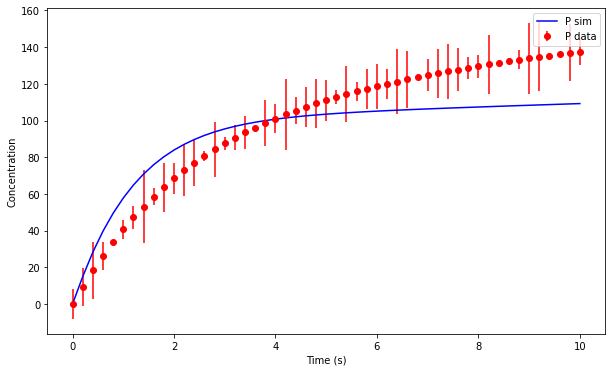

In [9]:
# Initial comparison with values defined in the model
compare_data_simulation(y)

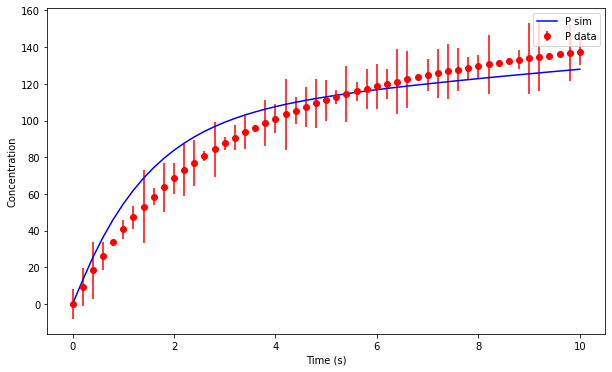

In [10]:
y2 = sim.run(param_values={'kf1': 0.1, 'kr1': 10, 'kcat1': 50, 'kf2': 0.1, 'kr2': 1000, 'kcat2': 35})
compare_data_simulation(y2)

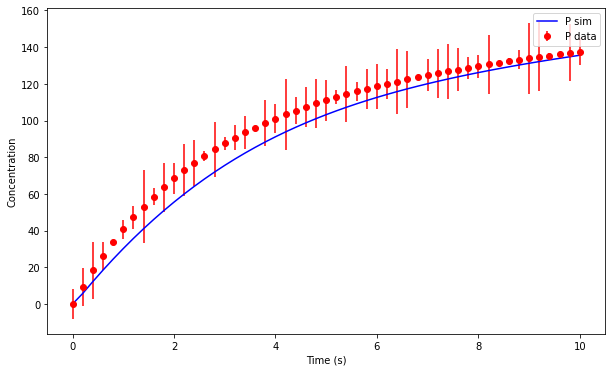

In [11]:
y3 = sim.run(param_values={'kf1': 0.1, 'kr1': 10, 'kcat1': 10, 'kf2': 0.12, 'kr2': 100, 'kcat2': 5})
compare_data_simulation(y3)

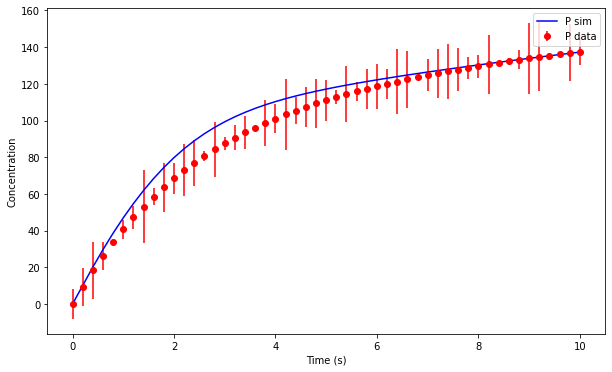

In [12]:
y4 = sim.run(param_values={'kf1': 0.5, 'kr1': 30, 'kcat1': 10, 'kf2': 0.12, 'kr2': 100, 'kcat2': 5})
compare_data_simulation(y4)

<BarContainer object of 6 artists>

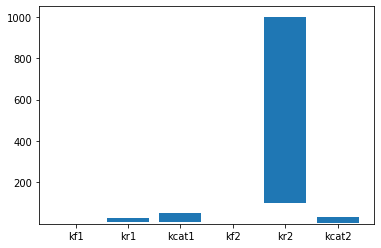

In [13]:
x = ['kf1', 'kr1', 'kcat1', 'kf2', 'kr2', 'kcat2']
y_bot = [0.1, 10, 10, 0.1, 100, 5]
y_dif = [0.4, 20, 40, 0.02, 900, 30]

plt.bar(x, y_dif, bottom=y_bot)

<BarContainer object of 2 artists>

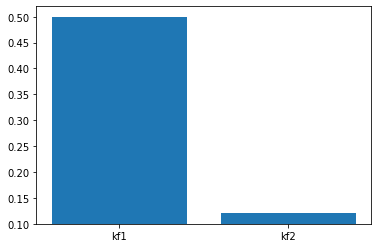

In [14]:
x = ['kf1', 'kf2']
y_bot = [0.1,  0.1]
y_dif = [0.4, 0.02]

plt.bar(x, y_dif, bottom=y_bot)

# [Particle Swarm Optimization](http://ai.unibo.it/sites/ai.unibo.it/files/u11/pso.pdf)

In [15]:
Image(url= "https://docs.google.com/uc?export=download&id=1Zh2dfLNcM2wyFL9oE2yD6I_SjVFRkGvJ", width=500)

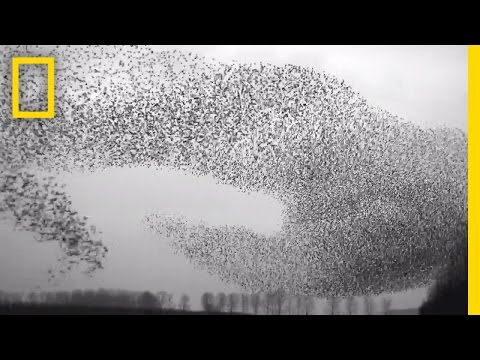

In [16]:
from IPython.lib.display import YouTubeVideo
YouTubeVideo('V4f_1_r80RY')

* # Inspired from the social behavior and dynamic movements with communication of birds and fish
* # Developed by James Kennedy and Russel Eberhart in 1995
* # Combines self-experiences with social experiences
* # [Explore PSO](http://www.macs.hw.ac.uk/~dwcorne/mypages/apps/pso.html)

# Cooperation example

In [17]:
Image(url= "https://docs.google.com/uc?export=download&id=1FbXVUTF3H8tQnviEitQcmV_kRdqfN3g2", width=500)

## Image adapted from a presentation by [Maurice Clerk](http://clerc.maurice.free.fr/pso/)

# PSO basic idea

* ## Each particle is searching for the optimum
* ## Each particle is moving and hence has a velocity (speed + direction)
* ## Each particle remembers its personal best position
* ## The particles in the swarm cooperate. They exchange information about what they've discovered in the places they have visited
* ## The cooperation is very simple:
    * ## Each particle has a neighborhood associated with it
    * ## Each particle knows and uses the location of the particle with best fitness to adjust its velocity
    

In [18]:
Image(url= "https://docs.google.com/uc?export=download&id=1DNWzuzRSEz9mL606nJNplc4i31d3t8Fh", width=500)

In [19]:
Image(url= "https://docs.google.com/uc?export=download&id=1FRcJRisS-nG3J5FWZmo5778Z77_Bc6AW", width=500)

In [20]:
Video("https://docs.google.com/uc?export=download&id=1ZBZqdGlMcVtCim6R993xHVQYJZPJ_6xZ", width=500)

# Going back to our systems biology problem

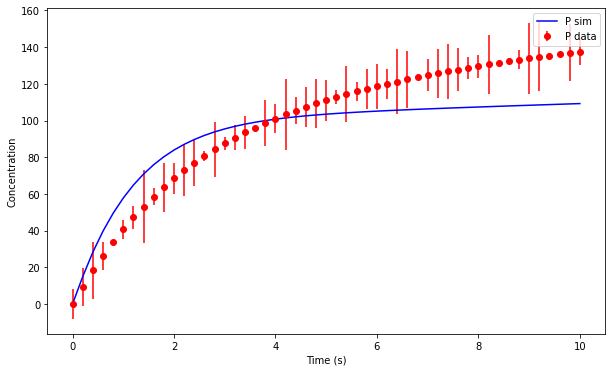

In [21]:
compare_data_simulation(y)

In [22]:
Image(url= "https://docs.google.com/uc?export=download&id=1S2P5GFs7vcKl9dFp8g0sbGK-KAPxsycY", width=500)

In [23]:
Image(url= "https://docs.google.com/uc?export=download&id=1vfByYE7CATbOfdvB3MG7aq4RGpuDEJWi", width=500)

In [24]:
from simplepso.pso import PSO
from pysb.simulator import ScipyOdeSimulator


solver = ScipyOdeSimulator(model, tspan=tspan)

idx_pars_calibrate = [0, 1, 2, 3, 4, 5]
rates_mask = [i in idx_pars_calibrate for i, par in enumerate(model.parameters)]

param_values = np.array([p.value for p in model.parameters])
nominal_values = np.array([p.value for p in model.parameters])
xnominal = np.log10(nominal_values[rates_mask])
bounds_radius = 2


def display(position):
    Y = np.copy(position)
    param_values[rates_mask] = 10 ** Y
    sim = solver.run(param_values=param_values).all
    plt.plot(tspan, sim['__s5'], label='Product sim')
    plt.errorbar(tspan, product_mean, yerr=product_std, label='Product data')
    plt.legend()
    plt.xlabel('time')
    plt.ylabel('concentration')
    plt.show()


def likelihood(position):
    Y = np.copy(position)
    param_values[rates_mask] = 10 ** Y
    sim = solver.run(param_values=param_values).all
    e1 = np.sum((np.array(product_mean) - sim['__s5']) ** 2 / (2 * np.array(product_std))) / len(product_mean)
    return e1


def run_example():
    pso = PSO(save_sampled=False, verbose=True)
    pso.set_start_position(xnominal)
    pso.set_bounds(parameter_range=2)
    pso.set_speed(speed_min=-0.25, speed_max=0.25)
    pso.run(num_particles=25, num_iterations=2, cost_function=likelihood)
    display(pso.best.pos)


2020-11-04 08:52:28.393 - pysb.simulator.scipyode - WARNING - [_interactive_] This system of ODEs will be evaluated in pure Python. This may be slow for large models. We recommend installing a package for compiling the ODEs to C code: 'weave' (recommended for Python 2) or 'cython' (recommended for Python 3). This warning can be suppressed by specifying compiler='python'.


2020-11-04 08:52:28.434 - simplepso - INFO - Logging started on simplepso
2020-11-04 08:52:28.435 - simplepso - INFO - Log entry time offset from UTC: -6.00 hours
2020-11-04 08:52:28.436 - simplepso - DEBUG - OS Platform: macOS-10.15.7-x86_64-i386-64bit
2020-11-04 08:52:28.437 - simplepso - DEBUG - Python version: 3.8.3
2020-11-04 08:52:28.452 - simplepso - DEBUG - Hostname: macbook-pro.attlocal.net
2020-11-04 08:52:29.013 - simplepso - INFO - iteration         best	        mean	         min	         max	         std
2020-11-04 08:52:29.014 - simplepso - INFO - 1              114.370	    2332.500	     114.370	    5287.901	    1769.286
2020-11-04 08:52:29.413 - simplepso - INFO - 2              114.370	    2131.585	     146.920	    5244.917	    1714.558


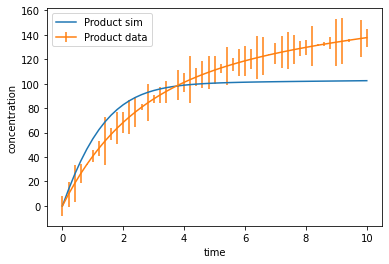

In [25]:
run_example()